In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [119]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 25, 50, 100],
    'max_features': [None, 'sqrt', 'log2'],
}

validator = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10)
validator.fit(X_train, y_train)

best_params = validator.best_params_
best_score = validator.best_score_

best_params = validator.best_params_
best_score = validator.best_score_

print("Mejores hiperparámetros:", best_params)
print("Puntaje de precisión con los mejores hiperparámetros:", best_score)


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 25, 'max_features': None}
Puntaje de precisión con los mejores hiperparámetros: 0.881725912975913


Cross-validation scores: [0.75       0.87222222 0.83333333 0.72777778 0.81666667 0.83888889
 0.90555556 0.82122905 0.76536313 0.81564246]
media de precision: 0.8146679081315952
Desvacion Estandar: 0.051690333033831554


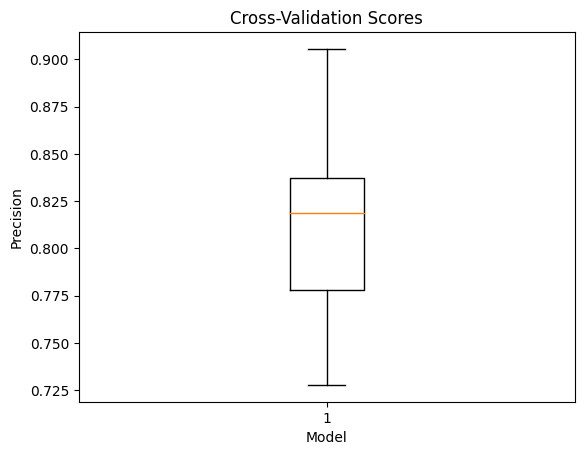

In [120]:
# Modelo de árboles de decisión con los mejores hiperparámetros
dt_model = DecisionTreeClassifier(random_state=42, **best_params)

# Entrenamiento y validación del modelo de árboles de decisión de Scikit-Learn
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

scores = cross_val_score(dt_model, X, y, cv=10)
print("Cross-validation scores:", scores)

mean_score = np.mean(scores)
std_score = np.std(scores)
print("media de precision:", mean_score)
print("Desvacion Estandar:", std_score)

scores = cross_val_score(dt_model, X, y, cv=10)
plt.boxplot(scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

In [121]:
# Puntajes de precisión obtenidos de la validación cruzada
cv_results = validator.cv_results_

columns = ["param_criterion", "param_max_depth", "param_max_features", "mean_test_score", "std_test_score", "rank_test_score"]
results_df = pd.DataFrame(cv_results)[columns].sort_values(by="rank_test_score").head(5)

ROC AUC score: 0.9370816738659011


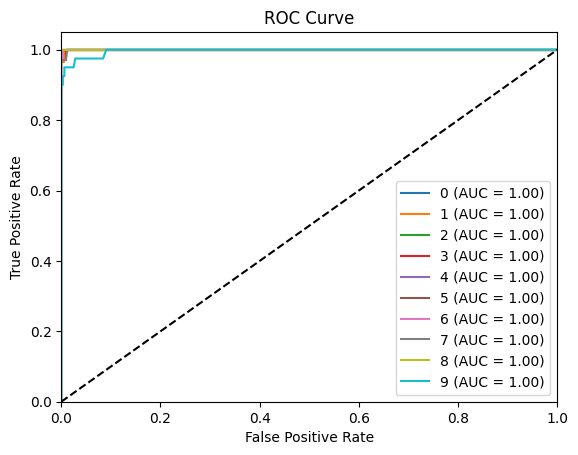

In [122]:
pruebas = dt_model.predict_proba(X_test)
auc = roc_auc_score(y_test, pruebas, multi_class="ovr")
print("ROC AUC score:", auc)

def plot_roc_curve(pruebas, y_true, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, probas[:, i])
        roc_auc[i] = roc_auc_score(y_true == i, probas[:, i])
    fig, ax = plt.subplots()
    for i in range(len(classes)):
        ax.plot(fpr[i], tpr[i], label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")
    ax.plot([0, 1], [0, 1], "k--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")
    ax.legend()
    plt.show()

    pruebas = dt_model.predict_proba(X_test)
plot_roc_curve(pruebas, y_test, digits.target_names)

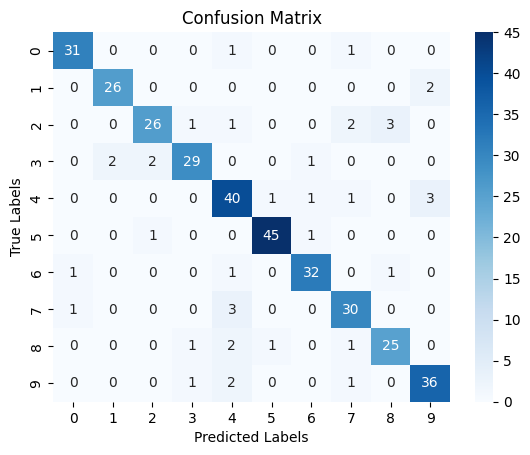

In [123]:
def plot_confusion_matrix(conf_matrix, classes):
    fig, ax = plt.subplots()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
                xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, digits.target_names)

In [124]:
print("Resultados de la validación cruzada:")
print(results_df)

Resultados de la validación cruzada:
   param_criterion param_max_depth param_max_features  mean_test_score  \
21         entropy             100               None         0.881726   
18         entropy              50               None         0.881726   
15         entropy              25               None         0.881726   
3             gini              25               None         0.852491   
6             gini              50               None         0.852491   

    std_test_score  rank_test_score  
21        0.025877                1  
18        0.025877                1  
15        0.025877                1  
3         0.028903                4  
6         0.028903                4  


ALGORITMO DE RANDOM FOREST


In [125]:
def plot_roc_curve(probas, y_true, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, probas[:, i])
        roc_auc[i] = roc_auc_score(y_true == i, probas[:, i])
    fig, ax = plt.subplots()
    for i in range(len(classes)):
        ax.plot(fpr[i], tpr[i], label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")
    ax.plot([0, 1], [0, 1], "k--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("Tasa de falsos positivos")
    ax.set_ylabel("Tasa de verdaderos positivos")
    ax.set_title("Curvas ROC")
    ax.legend()
    plt.show()


In [126]:
def plot_confusion_matrix(conf_matrix, classes):
    plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Matriz de Confusión")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = conf_matrix.max() / 2
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("Etiqueta Real")
    plt.xlabel("Etiqueta Predicha")
    plt.show()

In [127]:
rf_model = RandomForestClassifier(random_state=42)

In [128]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15],
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"]
}

validator = GridSearchCV(rf_model, param_grid, cv=5)
validator.fit(X_train, y_train)

columns = ["param_criterion", "param_max_depth", "param_n_estimators", "param_max_features",
           "mean_test_score", "std_test_score", "rank_test_score"]
results_df = pd.DataFrame(validator.cv_results_)[columns].sort_values(by="rank_test_score").head(5)
print(results_df)


   param_criterion param_max_depth param_n_estimators param_max_features  \
35         entropy              15                200               log2   
34         entropy              15                100               log2   
29         entropy              10                200               log2   
8             gini              10                200               sqrt   
13            gini              15                100               sqrt   

    mean_test_score  std_test_score  rank_test_score  
35         0.976338        0.006000                1  
34         0.974949        0.009702                2  
29         0.974942        0.010895                3  
8          0.974255        0.008409                4  
13         0.974252        0.007168                5  


In [129]:
best_model = validator.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Precisión:", acc)

Precisión: 0.975


In [130]:
probas = best_model.predict_proba(X_test)
auc = roc_auc_score(y_test, probas, multi_class="ovr")
print("Puntaje de ROC AUC:", auc)


Puntaje de ROC AUC: 0.9995887363977524


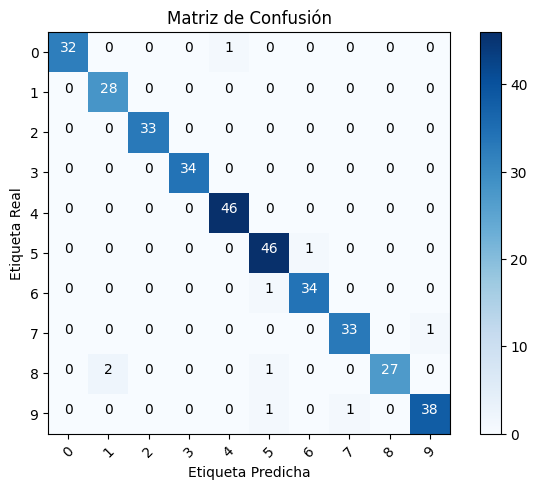

In [133]:
conf_matrix2 = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix2, digits.target_names)

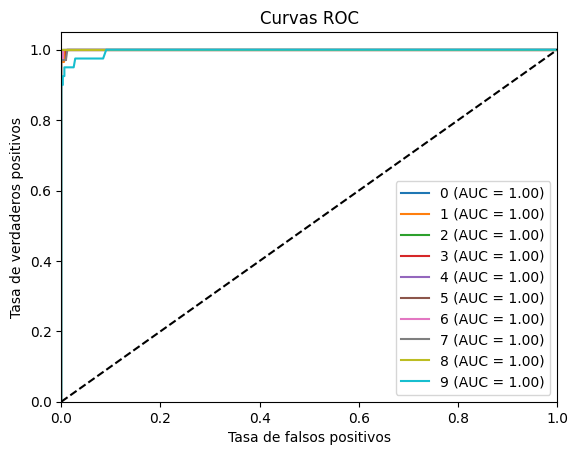

In [132]:
plot_roc_curve(probas, y_test, digits.target_names)